In [18]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
print(__doc__)

import numpy as np
from matplotlib import pyplot as plt

from crawlab_toolbox import plotting

Automatically created module for IPython interactive environment


In [3]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
pca = PCA()

In [13]:
X_transformed = pca.fit_transform(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

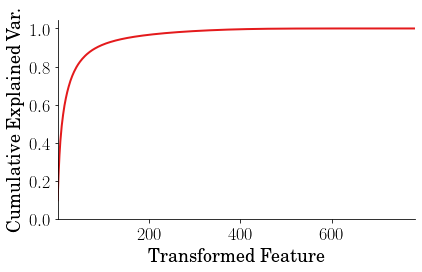

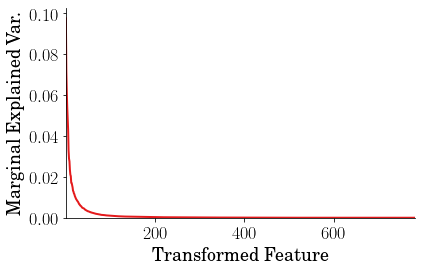

In [28]:

# responses = np.vstack((raw_fft.real,raw_fft.imag,(raw_fft * raw_fft.conj()).real))
responses = np.vstack((cumulative_variance))
plotting.generate_plot(np.arange(cumulative_variance.shape[0]),responses,
                         [''],'Transformed Feature','Cumulative Explained Var.',showplot=True,
                         template='publication',
                         ymax=0.05,
                         save_plot=True,
                         transparent=True,
                         num_col=2,
                         folder='figures/',
                         filename='Cumulative_Explained_Variance',
                         file_type='png')

responses = np.vstack((pca.explained_variance_ratio_))
plotting.generate_plot(np.arange(cumulative_variance.shape[0]),responses,
                         [''],'Transformed Feature','Marginal Explained Var.',showplot=True,
                         template='publication',
                         ymax=0.05,
                         save_plot=True,
                         transparent=True,
                         num_col=2,
                         folder='figures/',
                         filename='Marginal_Explained_Variance',
                         file_type='png')



In [39]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)

In [40]:
import matplotlib as mpl

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

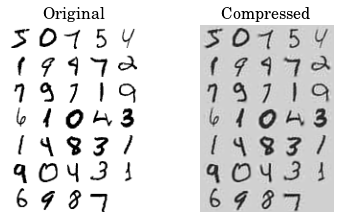

In [43]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

plt.savefig("figures/PCA_Compression.png")